**Import packages**

In [1]:
!pip install pytictoc

In [2]:
!pip install tensorflow

In [3]:
import random
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pytictoc import TicToc
warnings.filterwarnings( "ignore" )

**Load the dataset**

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

**Normalize the input data**

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Set directory to saved models**

In [6]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/ECE 696B/Project - ECE696B
# # %cd /content/gdrive/MyDrive/Colab Notebooks

In [7]:
%cd C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B

C:\Users\nh202\My Drive (nh202@arizona.edu)\ECE 696B\Project - ECE696B


In [8]:
from keras.models import load_model
CNN_CIFAR10_base = load_model('CNN_CIFAR10.h5')
CNN_CIFAR10_GNA_trained = load_model('CNN_CIFAR10_GNA_trained.h5')
CNN_CIFAR10_FGSM_trained = load_model('CNN_CIFAR10_FGSM_trained.h5')
# CNN_CIFAR10_CW_trained = load_model('CNN_CIFAR10_CW_trained.h5')

# Evaluate performance of CNN models

**Performance on GNA adversarial examples**

In [9]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\GNA

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\GNA


In [10]:
indexes = range(1000)
sigmas = np.arange(0,1.1,0.1)
stored_results = []
for i in sigmas:
  print(f'Sigma value: {np.round(i,1)}')
  stored_results.append(i)
    
  filename = 'CIFAR10_X_test_noisy_GNA_sigma' + str(np.round(i,1)) + '.npy'
  X_test_noisy = np.load(filename)
  
  avg_l2_norm = np.mean(np.sqrt(np.sum((X_test_noisy-X_test[indexes])**2, axis=(1,2))))
  stored_results.append(avg_l2_norm)
  print("Average l2 distance of the perturbation:", avg_l2_norm)

  print('\nTest accuracy on perturbed data')
  _,accuracy = CNN_CIFAR10_base.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_CIFAR10_GNA_trained.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_CIFAR10_FGSM_trained.evaluate(X_test_noisy,y_test[indexes])
  stored_results.append(accuracy)

#   _,accuracy = CNN_CIFAR10_CW_trained.evaluate(X_test_noisy,y_test[indexes])
#   stored_results.append(accuracy)

  print('\n')

Sigma value: 0.0
Average l2 distance of the perturbation: 0.0

Test accuracy on perturbed data
32/32 [==============================] - 4s 105ms/step - loss: 0.5391 - accuracy: 0.8510


Sigma value: 0.1
Average l2 distance of the perturbation: 3.0837902228127985

Test accuracy on perturbed data
32/32 [==============================] - 5s 141ms/step - loss: 1.1129 - accuracy: 0.6940


Sigma value: 0.2
Average l2 distance of the perturbation: 5.828913201938512

Test accuracy on perturbed data
32/32 [==============================] - 4s 134ms/step - loss: 1.8951 - accuracy: 0.5230


Sigma value: 0.3
Average l2 distance of the perturbation: 8.100654975115406

Test accuracy on perturbed data
32/32 [==============================] - 3s 84ms/step - loss: 2.8213 - accuracy: 0.3900


Sigma value: 0.4
Average l2 distance of the perturbation: 9.856309148560845

Test accuracy on perturbed data
32/32 [==============================] - 3s 84ms/step - loss: 3.5526 - accuracy: 0.2880


Sigma value: 0.

In [11]:
stored_results = np.array(stored_results)
stored_results = stored_results.reshape(-1,5)
# stored_results = stored_results.reshape(-1,6)
df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','CNN_CIFAR10_base',\
                                 'CNN_CIFAR10_GNA_trained','CNN_CIFAR10_FGSM_trained'])
# df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','CNN_CIFAR10_base',\
#                                  'CNN_CIFAR10_GNA_trained','CNN_CIFAR10_FGSM_trained','CNN_CIFAR10_CW_trained'])
df.to_csv('Performance of adversarially trained CNN models on GNA [CIFAR10].csv', index=False)
df

,sigma,avg_l2_norm,CNN_CIFAR10_base,CNN_CIFAR10_GNA_trained,CNN_CIFAR10_FGSM_trained
0,0.0,0.000000,0.888,0.854,0.851
1,0.1,3.083790,0.165,0.790,0.694
2,0.2,5.828913,0.108,0.651,0.523
3,0.3,8.100655,0.109,0.559,0.390
4,0.4,9.856309,0.122,0.481,0.288
5,0.5,11.189331,0.107,0.368,0.224
6,0.6,12.185753,0.114,0.334,0.188
7,0.7,12.947098,0.112,0.286,0.163
8,0.8,13.542925,0.098,0.222,0.143
9,0.9,14.018838,0.105,0.200,0.137


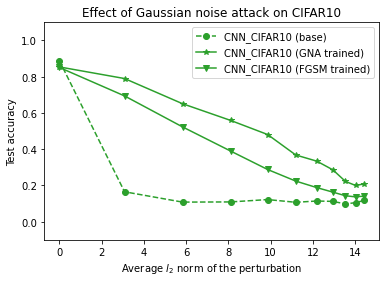

In [12]:
df = pd.read_csv('Performance of adversarially trained CNN models on GNA [CIFAR10].csv')
plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_base'],'o--', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_GNA_trained'],'*-', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_FGSM_trained'],'v-', color = 'C2')
# plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_CW_trained'],'d-', color = 'C2')


plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['CNN_CIFAR10 (base)', 'CNN_CIFAR10 (GNA trained)',\
            'CNN_CIFAR10 (FGSM trained)'])
# plt.legend(['CNN_CIFAR10 (base)', 'CNN_CIFAR10 (GNA trained)',\
#             'CNN_CIFAR10 (FGSM trained)', 'CNN_CIFAR10 (CW trained)'])
plt.title('Effect of Gaussian noise attack on CIFAR10')
plt.savefig('Adversarially trained CNN models GNA on CIFAR10 [l2 norm]', dpi=600)
plt.show()

**Performance on FGSM adversarial examples**

In [13]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\FGSM

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\FGSM


In [14]:
indexes = range(1000)
stored_results = []
for eps in np.arange(0.1,1.1,0.1):
    
  print(f'eps value: {np.round(eps,1)}')
  stored_results.append(eps)

  np_array_filename = 'CIFAR10_FGSM_'+ str(len(indexes)) +'_adv_examples_eps_'+ str(round(eps,1)) + '.npz'
  data = np.load(np_array_filename)

  # access the arrays using their keys
  X_test_FGSM_CNN = data['X_test_FGSM_CNN']

  avg_l2_norm_CNN = np.mean(np.sqrt(np.sum((X_test_FGSM_CNN-X_test[:len(indexes)])**2, axis=(1,2))))
  stored_results.append(avg_l2_norm_CNN)
    
  _,accuracy = CNN_CIFAR10_base.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_CIFAR10_GNA_trained.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)

  _,accuracy = CNN_CIFAR10_FGSM_trained.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
  stored_results.append(accuracy)

#   _,accuracy = CNN_CIFAR10_CW_trained.evaluate(X_test_FGSM_CNN[indexes],y_test[indexes])
#   stored_results.append(accuracy)
    

eps value: 0.1
32/32 [==============================] - 3s 89ms/step - loss: 0.7548 - accuracy: 0.7880
eps value: 0.2
32/32 [==============================] - 3s 92ms/step - loss: 0.8695 - accuracy: 0.7800
eps value: 0.3
32/32 [==============================] - 3s 94ms/step - loss: 1.1454 - accuracy: 0.7150
eps value: 0.4
32/32 [==============================] - 3s 95ms/step - loss: 1.5446 - accuracy: 0.6150
eps value: 0.5
32/32 [==============================] - 3s 100ms/step - loss: 1.9828 - accuracy: 0.5440
eps value: 0.6
32/32 [==============================] - 3s 108ms/step - loss: 2.4488 - accuracy: 0.4600
eps value: 0.7
32/32 [==============================] - 3s 96ms/step - loss: 2.8327 - accuracy: 0.3860
eps value: 0.8
32/32 [==============================] - 3s 98ms/step - loss: 3.1016 - accuracy: 0.3550
eps value: 0.9
32/32 [==============================] - 3s 95ms/step - loss: 3.2418 - accuracy: 0.3390
eps value: 1.0
32/32 [==============================] - 3s 97ms/step - 

In [15]:
stored_results = np.array(stored_results)
stored_results = stored_results.reshape(-1,5)
# stored_results = stored_results.reshape(-1,6)
df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','CNN_CIFAR10_base',\
                                 'CNN_CIFAR10_GNA_trained','CNN_CIFAR10_FGSM_trained'])
# df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','CNN_CIFAR10_base',\
#                                  'CNN_CIFAR10_GNA_trained','CNN_CIFAR10_FGSM_trained','CNN_CIFAR10_CW_trained'])
df.to_csv('Performance of adversarially trained CNN models on FGSM [CIFAR10].csv', index=False)
df

,sigma,avg_l2_norm,CNN_CIFAR10_base,CNN_CIFAR10_GNA_trained,CNN_CIFAR10_FGSM_trained
0,0.1,3.134012,0.074,0.353,0.788
1,0.2,6.113226,0.097,0.263,0.780
2,0.3,8.860026,0.089,0.239,0.715
3,0.4,11.309061,0.096,0.202,0.615
4,0.5,13.409303,0.086,0.170,0.544
5,0.6,15.122277,0.095,0.143,0.460
6,0.7,16.410184,0.101,0.133,0.386
7,0.8,17.268572,0.102,0.117,0.355
8,0.9,17.736445,0.101,0.116,0.339
9,1.0,17.897171,0.099,0.116,0.333


Test accuracy on unperturbed data
32/32 [==============================] - 3s 98ms/step - loss: 0.5391 - accuracy: 0.8510


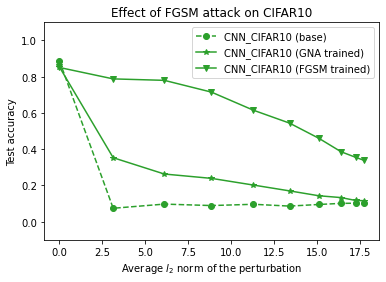

In [16]:
df = pd.read_csv('Performance of adversarially trained CNN models on FGSM [CIFAR10].csv')

df = df.shift(1)
print('Test accuracy on unperturbed data')
_, accuracy_base = CNN_CIFAR10_base.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_GNA_trained = CNN_CIFAR10_GNA_trained.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_FGSM_trained = CNN_CIFAR10_FGSM_trained.evaluate(X_test[indexes],y_test[indexes]);
# _, accuracy_CW_trained = CNN_CIFAR10_CW_trained.evaluate(X_test[indexes],y_test[indexes]);

df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained]
# df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained, accuracy_CW_trained]

plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_base'],'o--', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_GNA_trained'],'*-', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_FGSM_trained'],'v-', color = 'C2')
# plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_CW_trained'],'d-', color = 'C2')


plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['CNN_CIFAR10 (base)', 'CNN_CIFAR10 (GNA trained)',\
            'CNN_CIFAR10 (FGSM trained)'])
# plt.legend(['CNN_CIFAR10 (base)', 'CNN_CIFAR10 (GNA trained)',\
#             'CNN_CIFAR10 (FGSM trained)', 'CNN_CIFAR10 (CW trained)'])
plt.title('Effect of FGSM attack on CIFAR10')
plt.savefig('Adversarially trained CNN models FGSM on CIFAR10 [l2 norm]', dpi=600)
plt.show()

**Performance on CW adversarial examples**

In [17]:
%cd C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\CW

C:\Users\nh202\OneDrive - University of Arizona\Adversairal Examples - ECE 696B\CW


In [18]:
indexes = range(1000)
stored_results = []
lot = 0
for c in np.arange(0.1,1.1,0.1):
    filename = 'CIFAR10_x_adv_stack_CNN_Lot' + str(lot+1) + '_c' + str(np.round(c,1)) + '.npy'
    x_adv_stack = np.load(filename)
    
    stored_results.append(np.round(c,1))
    
    avg_l2_norm = np.mean(np.sqrt(np.sum((x_adv_stack-X_test[:len(x_adv_stack)])**2, axis=(1,2))))    
    
    if np.isnan(avg_l2_norm):
        delta = x_adv_stack-X_test[:len(x_adv_stack)]
        indices = np.argwhere(np.isnan(delta))
        delta[indices] = 1
        x_adv_stack = X_test[:len(x_adv_stack)] + delta
        x_adv_stack = np.clip(x_adv_stack, 0, 1)
        delta = x_adv_stack-X_test[:len(x_adv_stack)]
        avg_l2_norm = np.mean(np.sqrt(np.sum((x_adv_stack-X_test[:len(x_adv_stack)])**2, axis=(1,2))))
        
    stored_results.append(avg_l2_norm)
    
    _,accuracy = CNN_CIFAR10_base.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

    _,accuracy = CNN_CIFAR10_GNA_trained.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

    _,accuracy = CNN_CIFAR10_FGSM_trained.evaluate(x_adv_stack,y_test[indexes])
    stored_results.append(accuracy)

#     _,accuracy = CNN_CIFAR10_CW_trained.evaluate(x_adv_stack,y_test[indexes])
#     stored_results.append(accuracy)

32/32 [==============================] - 3s 98ms/step - loss: 1.2541 - accuracy: 0.6930


In [19]:
stored_results = np.array(stored_results)
stored_results = stored_results.reshape(-1,5)
# stored_results = stored_results.reshape(-1,6)
df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','CNN_CIFAR10_base',\
                                 'CNN_CIFAR10_GNA_trained','CNN_CIFAR10_FGSM_trained'])
# df = pd.DataFrame(stored_results, columns = ['sigma','avg_l2_norm','CNN_CIFAR10_base',\
#                                  'CNN_CIFAR10_GNA_trained','CNN_CIFAR10_FGSM_trained','CNN_CIFAR10_CW_trained'])
df.to_csv('Performance of adversarially trained CNN models on CW [CIFAR10].csv', index=False)
df

,sigma,avg_l2_norm,CNN_CIFAR10_base,CNN_CIFAR10_GNA_trained,CNN_CIFAR10_FGSM_trained
0,0.1,1.854422,0.071,0.649,0.748
1,0.2,2.446433,0.071,0.616,0.741
2,0.3,2.813692,0.071,0.599,0.707
3,0.4,3.042917,0.071,0.598,0.690
4,0.5,2.250976,0.071,0.623,0.746
5,0.6,2.446433,0.071,0.616,0.741
6,0.7,2.561476,0.071,0.597,0.737
7,0.8,2.698132,0.071,0.604,0.703
8,0.9,2.812948,0.071,0.598,0.707
9,1.0,2.911540,0.071,0.587,0.693


Test accuracy on unperturbed data
32/32 [==============================] - 3s 95ms/step - loss: 0.5391 - accuracy: 0.8510


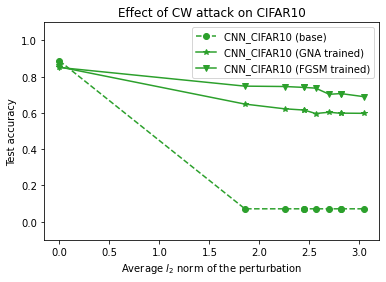

In [20]:
df = pd.read_csv('Performance of adversarially trained CNN models on CW [CIFAR10].csv')

df = df.shift(1)
print('Test accuracy on unperturbed data')
_, accuracy_base = CNN_CIFAR10_base.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_GNA_trained = CNN_CIFAR10_GNA_trained.evaluate(X_test[indexes],y_test[indexes]);
_, accuracy_FGSM_trained = CNN_CIFAR10_FGSM_trained.evaluate(X_test[indexes],y_test[indexes]);
# _, accuracy_CW_trained = CNN_CIFAR10_CW_trained.evaluate(X_test[indexes],y_test[indexes]);
df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained]
# df.iloc[0] = [0, 0, accuracy_base, accuracy_GNA_trained, accuracy_FGSM_trained, accuracy_CW_trained]

df = df.sort_values('avg_l2_norm', ascending=True)

plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_base'],'o--', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_GNA_trained'],'*-', color = 'C2')
plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_FGSM_trained'],'v-', color = 'C2')
# plt.plot(df['avg_l2_norm'],df['CNN_CIFAR10_CW_trained'],'d-', color = 'C2')


plt.xlabel('Average $l_2$ norm of the perturbation')
plt.ylabel('Test accuracy')
plt.ylim([-0.1, 1.1])
plt.legend(['CNN_CIFAR10 (base)', 'CNN_CIFAR10 (GNA trained)',\
            'CNN_CIFAR10 (FGSM trained)'])
# plt.legend(['CNN_CIFAR10 (base)', 'CNN_CIFAR10 (GNA trained)',\
#             'CNN_CIFAR10 (FGSM trained)', 'CNN_CIFAR10 (CW trained)'])
plt.title('Effect of CW attack on CIFAR10')
plt.savefig('Adversarially trained CNN models CW on CIFAR10 [l2 norm]', dpi=600)
plt.show()